In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)

data = data._get_numeric_data()

X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label

# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-z))

    def loss(self, output, y): 
        """Calculate loss"""
        return (-y * np.log(self.activation(output)) - (1 - y) * np.log(1 - self.activation(output))).mean()

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>0.5,1,0)

In [3]:
from sklearn.metrics import precision_score, recall_score,confusion_matrix
lr = LogisticRegression(eta=0.05,n_epoch=300,random_state=10)
lr.fit(X_train_std,y_train)
pred = lr.predict(X_test_std)

### Confusion Matrix

Text(0,0.5,'True label')

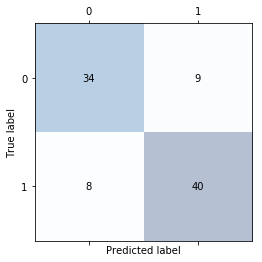

In [4]:
confmat = confusion_matrix(y_true=y_test, y_pred=pred)
fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

### F1 score

In [5]:
print('[F1-score]')
print(2/(1/precision_score(y_true=y_test, y_pred=pred)+1/recall_score(y_true=y_test, y_pred=pred)))

[F1-score]
0.8247422680412372
